In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2022-07-09 20:33:14.649612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-09 20:33:14.649716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))
Y = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))

2022-07-09 20:33:33.915655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-09 20:33:33.915716: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-09 20:33:33.915742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-SaHeB): /proc/driver/nvidia/version does not exist


In [3]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
	tf.keras.layers.Dense(1),
	tf.keras.layers.Dense(1),
	tf.keras.layers.Dense(1),
	tf.keras.layers.Dense(1),
])
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_1.fit(tf.expand_dims(X, axis=1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 12.5964 - mae: 12.5964
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 12.5025 - mae: 12.5025
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 12.3993 - mae: 12.3993
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 12.2851 - mae: 12.2851
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 12.1582 - mae: 12.1582


In [4]:
model_1.predict([17])

1/1 [==============================] - 0s 131ms/step


array([[6.695318]], dtype=float32)

In [5]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
	tf.keras.layers.Dense(100),
	tf.keras.layers.Dense(1),
	tf.keras.layers.Dense(1),
	tf.keras.layers.Dense(1),
])
model_2.compile(
 loss=tf.keras.losses.mae,
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
 metrics=['mae'])
model_2.fit(tf.expand_dims(X, axis=1), Y, epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 619ms/step - loss: 13.1849 - mae: 13.1849
Epoch 2/400
1/1 [==============================] - 0s 7ms/step - loss: 12.4566 - mae: 12.4566
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 11.6907 - mae: 11.6907
Epoch 4/400
1/1 [==============================] - 0s 6ms/step - loss: 10.8819 - mae: 10.8819
Epoch 5/400
1/1 [==============================] - 0s 9ms/step - loss: 10.0240 - mae: 10.0240
Epoch 6/400
1/1 [==============================] - 0s 6ms/step - loss: 9.1095 - mae: 9.1095
Epoch 7/400
1/1 [==============================] - 0s 20ms/step - loss: 8.1310 - mae: 8.1310
Epoch 8/400
1/1 [==============================] - 0s 6ms/step - loss: 7.0802 - mae: 7.0802
Epoch 9/400
1/1 [==============================] - 0s 12ms/step - loss: 6.6754 - mae: 6.6754
Epoch 10/400
1/1 [==============================] - 0s 10ms/step - loss: 7.1091 - mae: 7.1091
Epoch 11/400
1/1 [==============================] - 0s 7ms/step 

In [6]:
model_2.predict([17])

1/1 [==============================] - 0s 112ms/step


array([[26.906107]], dtype=float32)

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [9]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
	tf.keras.layers.Dense(100),
	tf.keras.layers.Dense(1),
	tf.keras.layers.Dense(1),
	tf.keras.layers.Dense(1),
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_3.compile(
 loss=tf.keras.losses.mae,
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
 metrics=['mae'])

In [10]:
history = model_3.fit(x_train, y_train, epochs=400, callbacks=[callback])

Epoch 1/400
13/13 [==============================] - 1s 2ms/step - loss: 33.0079 - mae: 33.0079
Epoch 2/400
13/13 [==============================] - 0s 3ms/step - loss: 12.4361 - mae: 12.4361
Epoch 3/400
13/13 [==============================] - 0s 2ms/step - loss: 8.8240 - mae: 8.8240
Epoch 4/400
13/13 [==============================] - 0s 3ms/step - loss: 7.0383 - mae: 7.0383
Epoch 5/400
13/13 [==============================] - 0s 2ms/step - loss: 6.5696 - mae: 6.5696
Epoch 6/400
13/13 [==============================] - 0s 3ms/step - loss: 6.5164 - mae: 6.5164
Epoch 7/400
13/13 [==============================] - 0s 3ms/step - loss: 6.3905 - mae: 6.3905
Epoch 8/400
13/13 [==============================] - 0s 3ms/step - loss: 5.8476 - mae: 5.8476
Epoch 9/400
13/13 [==============================] - 0s 3ms/step - loss: 6.8887 - mae: 6.8887
Epoch 10/400
13/13 [==============================] - 0s 2ms/step - loss: 5.9805 - mae: 5.9805
Epoch 11/400
13/13 [==============================] - 0

In [11]:
y_pred = model_3.predict(x_test)
y_pred

4/4 [==============================] - 0s 2ms/step


array([[ 1.8842208],
       [23.71329  ],
       [23.607576 ],
       [24.603449 ],
       [24.258543 ],
       [22.673517 ],
       [32.521385 ],
       [27.771336 ],
       [21.306198 ],
       [24.105661 ],
       [ 9.756416 ],
       [24.059523 ],
       [23.628586 ],
       [25.305197 ],
       [18.880676 ],
       [26.71258  ],
       [22.760576 ],
       [22.693867 ],
       [23.900543 ],
       [26.251831 ],
       [18.544205 ],
       [ 4.469414 ],
       [22.732883 ],
       [25.082891 ],
       [34.357677 ],
       [24.810223 ],
       [25.496164 ],
       [37.141262 ],
       [ 5.405011 ],
       [25.448305 ],
       [24.211905 ],
       [ 7.7342477],
       [31.14708  ],
       [22.130978 ],
       [22.638897 ],
       [17.804224 ],
       [19.240568 ],
       [15.599102 ],
       [25.697018 ],
       [35.480778 ],
       [27.485792 ],
       [23.270708 ],
       [23.55455  ],
       [23.570993 ],
       [26.364994 ],
       [22.581264 ],
       [28.5581   ],
       [22.74

In [12]:
mae = model_3.evaluate(x_test, y_test)
mae

4/4 [==============================] - 0s 2ms/step - loss: 6.1810 - mae: 6.1810


[6.181005001068115, 6.181005001068115]

<AxesSubplot:>

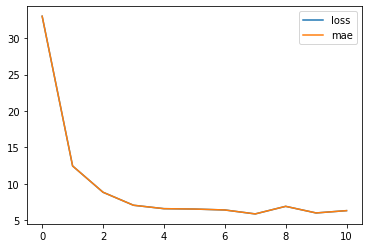

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [14]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [15]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [17]:
x = insurance_one_hot.drop('charges', axis=1)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [18]:
y = insurance_one_hot['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=42)
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((268, 11), (268,), (1070, 11), (1070,))

In [20]:
tf.random.set_seed(42)
model_ins = tf.keras.Sequential([
	tf.keras.layers.Dense(100, activation='relu'),
	tf.keras.layers.Dense(10),
	tf.keras.layers.Dense(10),
	tf.keras.layers.Dense(1),
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_ins.compile(
 loss=tf.keras.losses.mae,
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
 metrics=[tf.keras.metrics.mae])

In [21]:
history = model_ins.fit(x_train, y_train, epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 11231.6699 - mean_absolute_error: 11231.6699
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 7648.8809 - mean_absolute_error: 7648.8809
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 7226.2021 - mean_absolute_error: 7226.2021
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 6968.5786 - mean_absolute_error: 6968.5786
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 6678.9771 - mean_absolute_error: 6678.9771
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 6354.2246 - mean_absolute_error: 6354.2246
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 6143.5059 - mean_absolute_error: 6143.5059
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 5908.1802 - mean_absolute_error: 5908.1802
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - los

Text(0.5, 0, 'epochs')

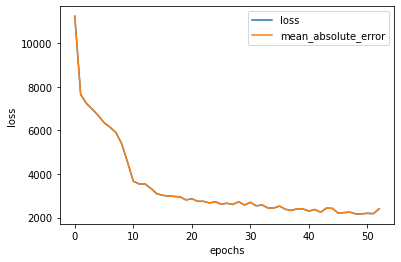

In [22]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [23]:
y_pred_ins = model_ins.predict(x_test)
y_pred_ins

9/9 [==============================] - 0s 2ms/step


array([[10283.13  ],
       [ 6009.9565],
       [36237.387 ],
       [10566.778 ],
       [29136.389 ],
       [ 5341.755 ],
       [ 2383.0977],
       [15507.678 ],
       [ 4175.6455],
       [11636.869 ],
       [26275.73  ],
       [ 8344.877 ],
       [ 4582.483 ],
       [53939.574 ],
       [56367.76  ],
       [49414.234 ],
       [11246.429 ],
       [46131.477 ],
       [ 9266.503 ],
       [29574.121 ],
       [ 5766.041 ],
       [ 8540.962 ],
       [ 1606.7996],
       [ 3512.0474],
       [12524.549 ],
       [12322.03  ],
       [13930.37  ],
       [ 5876.8535],
       [10949.319 ],
       [ 1429.9164],
       [ 9407.63  ],
       [13242.999 ],
       [ 2545.646 ],
       [ 6455.3467],
       [ 3478.004 ],
       [ 8551.979 ],
       [ 3011.1836],
       [ 8351.77  ],
       [28952.693 ],
       [40616.703 ],
       [ 5230.405 ],
       [ 3208.4507],
       [13079.451 ],
       [13411.387 ],
       [ 5681.9155],
       [13604.719 ],
       [ 4203.9556],
       [ 4957

In [24]:
model_ins.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2680.4985 - mean_absolute_error: 2680.4985


[2680.49853515625, 2680.49853515625]

In [30]:
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_ins))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2680.4985>